In [1]:
import sys
sys.path.append("../")

In [34]:
from CurvyCUSIPs.CurveDataFetcher import CurveDataFetcher
from CurvyCUSIPs.S490Swaps import S490Swaps
from CurvyCUSIPs.S490Swaptions import S490Swaptions

from pandas.tseries.offsets import CustomBusinessDay 
from pandas.tseries.holiday import USFederalHolidayCalendar

import pandas as pd
from datetime import datetime

import os
from dotenv import dotenv_values
env_path = os.path.join(os.getcwd(), "../.env")
config = dotenv_values(env_path)

import nest_asyncio
nest_asyncio.apply()

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
curve_data_fetcher = CurveDataFetcher()

In [13]:
s490_swaps = S490Swaps(s490_curve_db_path=r"..\db\nyclose_sofr_ois", curve_data_fetcher=curve_data_fetcher)
s490_swaptions = S490Swaptions(s490_swaps)

start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 1, 2)
bdates = pd.date_range(start=start_date, end=end_date, freq=CustomBusinessDay(calendar=USFederalHolidayCalendar()))

# ATM Grid

In [25]:
dt = datetime(2025, 1, 7)
s490_swaptions.get_vol_surfaces(date=datetime(2025, 1, 7), strike_offset=0)[dt]

,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,25Y,30Y
Expiry,,,,,,,,,,,,,,
1M,79.055049,100.803125,101.590681,102.384391,103.184301,102.015140,100.859226,99.716410,98.586543,97.469478,95.463787,93.499369,91.575374,89.690969
3M,85.881088,103.343046,103.764644,104.187962,104.613007,103.510547,102.419706,101.340361,100.272390,99.215674,96.999459,94.832748,92.714435,90.643440
6M,99.215674,107.787908,108.899124,107.862346,106.835438,105.958743,105.089242,103.911972,102.747891,101.596850,98.955713,96.383235,93.877632,91.437165
9M,105.821784,109.832208,110.004727,108.022498,106.994065,106.038742,105.168585,103.990426,102.826354,101.676192,99.032992,96.458505,93.914282,91.437165
1Y,112.867751,111.915280,111.121555,109.119201,107.152928,106.196186,105.247987,104.070738,102.906656,101.755595,99.071654,96.458505,93.914282,91.437165
2Y,112.391516,110.645320,109.057869,107.539217,106.041713,105.084926,104.136772,103.283153,102.436532,101.596850,99.127065,96.717320,94.366155,92.072146
3Y,108.899124,106.835438,105.724222,104.767422,103.819281,102.942481,102.073086,101.326833,100.586036,99.850654,97.549918,95.302195,93.106264,90.960930
4Y,106.572465,104.589397,103.639992,102.827117,101.896536,101.035974,100.311692,99.661355,98.973976,98.250380,95.986517,93.774818,91.787778,89.842843
5Y,104.295517,102.390576,101.596850,100.800000,100.009400,99.292477,98.580694,97.941579,97.306608,96.675753,94.627244,92.622142,90.659527,88.738499


# Vol Cube

In [26]:
s490_swaptions.get_vol_cube(date=dt)

{-200:                 1Y          2Y          3Y          4Y          5Y  \
 Expiry                                                               
 1M      133.969058  153.870433  150.822584  147.835107  144.906806   
 3M      132.226883  141.696417  138.341140  135.065313  131.867056   
 6M      126.269110  126.655636  123.165902  119.772321  116.472243   
 1Y      114.017233  112.916541  111.801263  109.704456  106.681777   
 2Y      102.954154  100.667808   99.673511   98.689034   97.714281   
 3Y       98.797548   96.836957   96.171530   95.366050   94.424118   
 4Y       94.808758   93.151887   92.511782   91.876077   91.244739   
 5Y       93.102085   91.671649   91.041716   90.416112   89.913629   
 6Y       91.426134   90.214933   89.595011   89.067640   88.601937   
 7Y       89.780352   88.781365   88.229611   87.768290   87.313103   
 8Y       88.164197   87.399467   86.944340   86.498957   86.055856   
 9Y       86.577134   86.039078   85.677791   85.247982   84.816713   


# 3 Surfaces:
- Expiry-Tail
- Expiry-Strike
- Tail-Strike

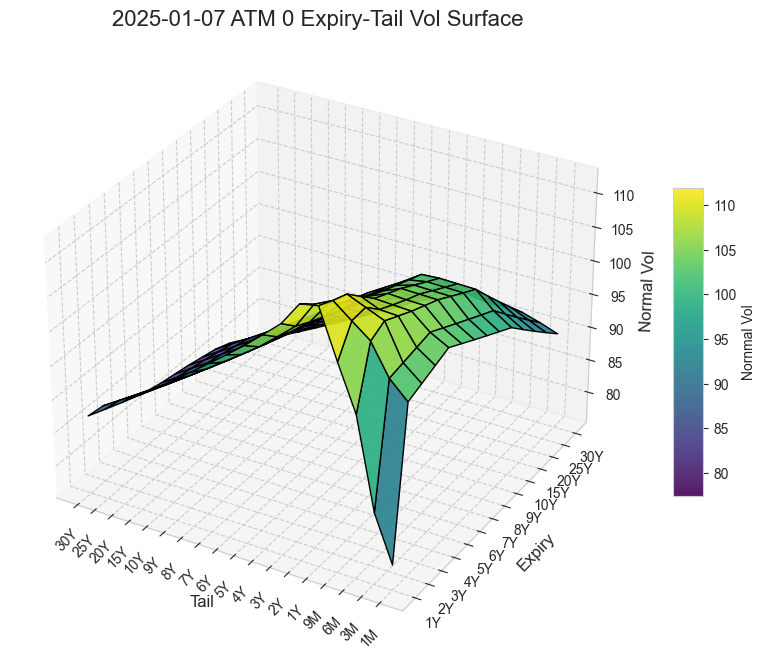

In [20]:
exp_tail_surf = s490_swaptions.get_vol_surfaces(date=datetime(2025, 1, 7), plot_surfaces=True, use_ploty=False, strike_offset=0)

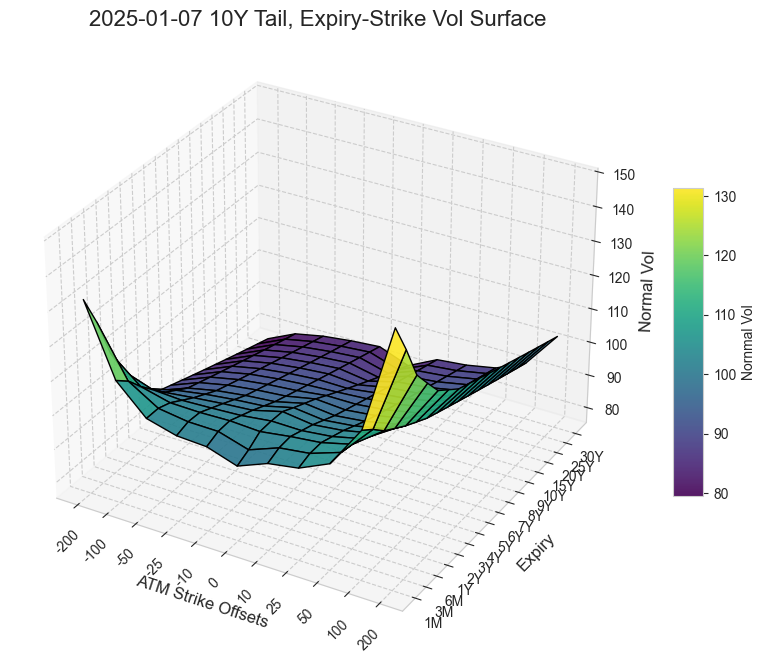

In [21]:
exp_strike_surf = s490_swaptions.get_vol_surfaces(date=datetime(2025, 1, 7), plot_surfaces=True, use_ploty=False, tail="10Y")

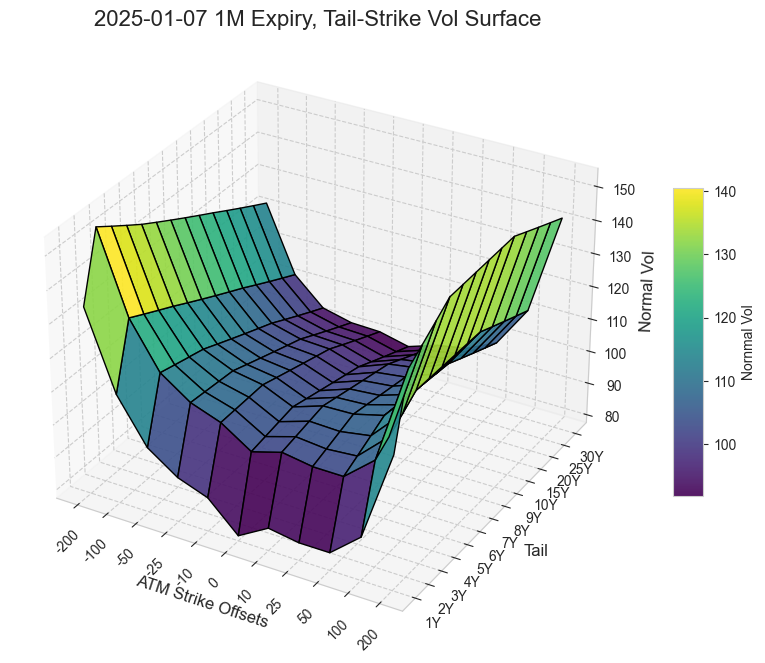

In [22]:
tail_strike_surf = s490_swaptions.get_vol_surfaces(date=datetime(2025, 1, 7), plot_surfaces=True, use_ploty=False, expiry="1M")

# Vol timeseries

FETCHING VOL TIMESERIES: 100%|██████████| 255/255 [00:00<00:00, 263.51it/s]


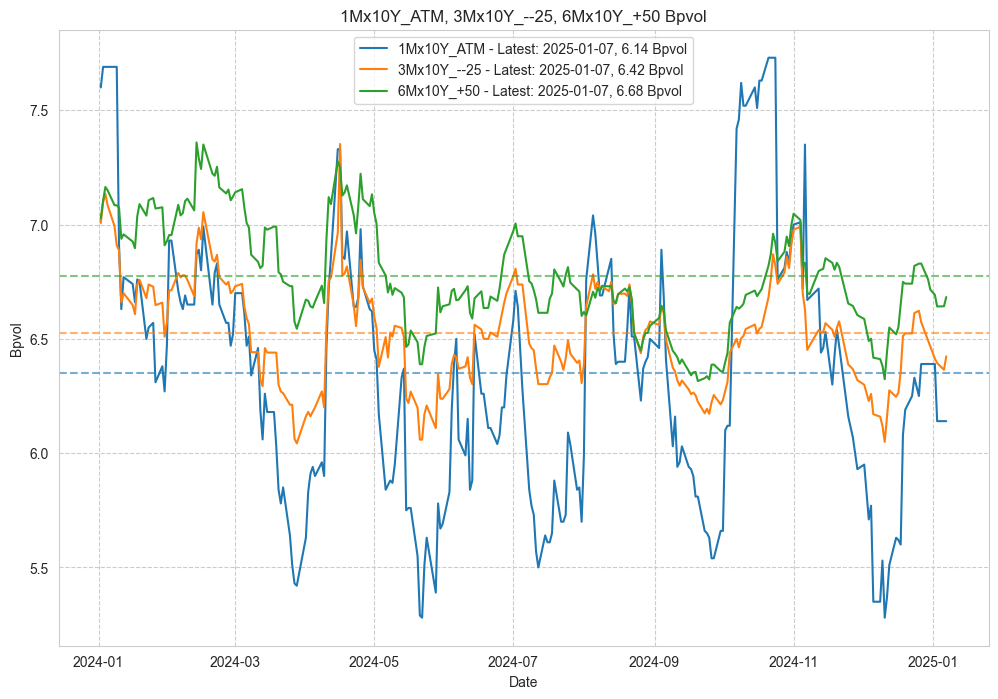

{'1Mx10Y_ATM':           Date  Normal Vol  Bpvol
 0   2024-01-02  120.646260   7.60
 1   2024-01-03  122.074965   7.69
 2   2024-01-04  122.074965   7.69
 3   2024-01-05  122.074965   7.69
 4   2024-01-08  122.074965   7.69
 ..         ...         ...    ...
 245 2024-12-31  101.438105   6.39
 246 2025-01-02  101.438105   6.39
 247 2025-01-03   97.469478   6.14
 248 2025-01-06   97.469478   6.14
 249 2025-01-07   97.469478   6.14
 
 [250 rows x 3 columns],
 '3Mx10Y_--25':           Date  Normal Vol     Bpvol
 0   2024-01-02  111.226182  7.006591
 1   2024-01-03  112.661687  7.097019
 2   2024-01-04  113.263269  7.134915
 3   2024-01-05  112.458776  7.084237
 4   2024-01-08  111.030272  6.994250
 ..         ...         ...       ...
 245 2024-12-31  102.622643  6.464619
 246 2025-01-02  101.808322  6.413321
 247 2025-01-03  101.505907  6.394271
 248 2025-01-06  101.036474  6.364700
 249 2025-01-07  101.968892  6.423436
 
 [250 rows x 3 columns],
 '6Mx10Y_+50':           Date  Normal Vol

In [ ]:
s490_swaptions.get_vol_timeseries(
    tenor_strike_pairs=[("1Mx10Y", 0), ("3Mx10Y", -25), ("6Mx10Y", 50)],
    start_date=datetime(2024, 1, 1),
    end_date=datetime(2025, 1, 7),
    plot_timeseries=True,
)